# Data Analysis

## Regression modeling

A general, primary goal of many statistical data analysis tasks is to relate the influence of one variable on another. For example, we may wish to know how different medical interventions influence the incidence or duration of disease, or perhaps a how baseball player's performance varies as a function of age.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.optimize import fmin

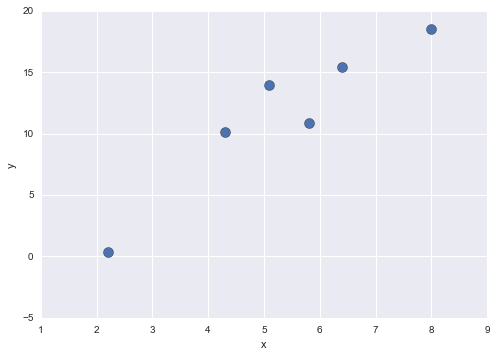

In [2]:
data = pd.DataFrame({'x':np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0]),
                    'y':np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])})
data.plot.scatter('x', 'y', s=100)

We can build a model to characterize the relationship between $X$ and $Y$, recognizing that additional factors other than $X$ (the ones we have measured or are interested in) may influence the response variable $Y$.

<div style="font-size: 150%;">  
$y_i = f(x_i) + \epsilon_i$
</div>

where $f$ is some function, for example a linear function:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
</div>

and $\epsilon_i$ accounts for the difference between the observed response $y_i$ and its prediction from the model $\hat{y_i} = \beta_0 + \beta_1 x_i$. This is sometimes referred to as **process uncertainty**.

We would like to select $\beta_0, \beta_1$ so that the difference between the predictions and the observations is zero, but this is not usually possible. Instead, we choose a reasonable criterion: ***the smallest sum of the squared differences between $\hat{y}$ and $y$***.

<div style="font-size: 120%;">  
$$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i])^2 = \sum_i \epsilon_i^2 $$  
</div>

Squaring serves two purposes: (1) to prevent positive and negative values from cancelling each other out and (2) to strongly penalize large deviations. Whether the latter is a good thing or not depends on the goals of the analysis.

In other words, we will select the parameters that minimize the squared error of the model.

In [3]:
sum_of_squares = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x) ** 2)

In [5]:
sum_of_squares([0,1], data.x, data.y)

333.35000000000002

In [6]:
b0,b1 = fmin(sum_of_squares, [0,1], args=(data.x, data.y))
b0,b1

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(-4.3500136038870876, 3.0000002915386412)

(0, 20)

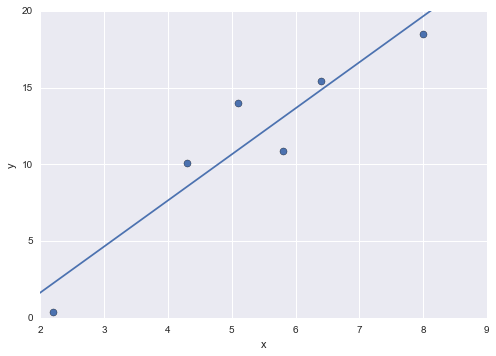

In [7]:
axes = data.plot.scatter('x', 'y', s=50)
axes.plot([0,10], [b0, b0+b1*10])
axes.set_xlim(2, 9)
axes.set_ylim(0, 20)

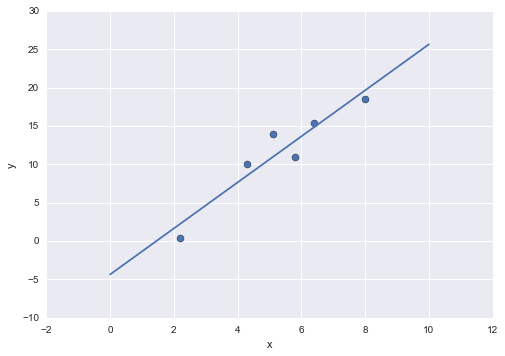

In [17]:
axes = data.plot.scatter('x', 'y', s=50)
axes.plot([0,10], [b0, b0+b1*10])

(0, 20)

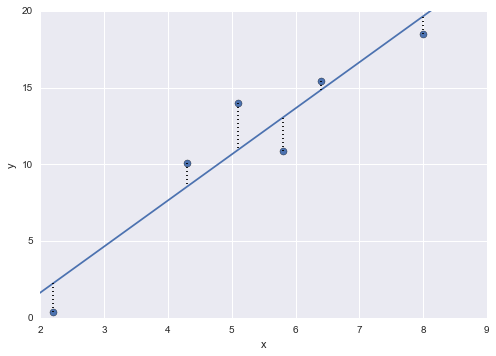

In [18]:
axes = data.plot.scatter('x', 'y', s=50)
axes.plot([0,10], [b0, b0+b1*10])
for i,(xi, yi) in data.iterrows():
    axes.plot([xi]*2, [yi, b0+b1*xi], 'k:')
axes.set_xlim(2, 9)
axes.set_ylim(0, 20)

Minimizing the sum of squares is not the only criterion we can use; it is just a very popular (and successful) one. For example, we can try to minimize the sum of absolute differences:

In [19]:
sum_of_absval = lambda theta, x, y: np.sum(np.abs(y - theta[0] - theta[1]*x))

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77

intercept: 0.0016, slope: 2.3


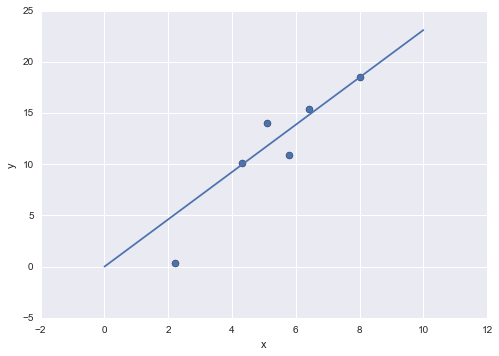

In [20]:
b0,b1 = fmin(sum_of_absval, [0,1], args=(data.x,data.y))
print('\nintercept: {0:.2}, slope: {1:.2}'.format(b0,b1))
axes = data.plot.scatter('x', 'y', s=50)
axes.plot([0,10], [b0, b0+b1*10])

We are not restricted to a straight-line regression model; we can represent a curved relationship between our variables by introducing **polynomial** terms. For example, a cubic model:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i$
</div>

In [21]:
sum_squares_quad = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2)) ** 2)

Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372

intercept: -1.1e+01, x: 6.1, x2: -0.3


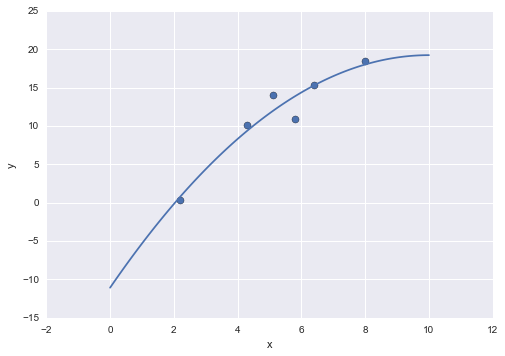

In [22]:
b0,b1,b2 = fmin(sum_squares_quad, [1,1,-1], args=(data.x, data.y))
print('\nintercept: {0:.2}, x: {1:.2}, x2: {2:.2}'.format(b0,b1,b2))
axes = data.plot.scatter('x', 'y', s=50)
xvals = np.linspace(0, 10, 100)
axes.plot(xvals, b0 + b1*xvals + b2*(xvals**2))

Although polynomial model characterizes a nonlinear relationship, it is a linear problem in terms of estimation. That is, the regression model $f(y | x)$ is linear in the parameters.

For some data, it may be reasonable to consider polynomials of order>2. For example, consider the relationship between the number of home runs a baseball player hits and the number of runs batted in (RBI) they accumulate; clearly, the relationship is positive, but we may not expect a linear relationship.

In [23]:
sum_squares_cubic = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2) 
                                  - theta[3]*(x**3)) ** 2)

In [24]:
wine = pd.read_table("../data/wine.dat", sep='\s+')

attributes = ['Grape',
            'Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

wine.columns = attributes

Optimization terminated successfully.
         Current function value: 41.134432
         Iterations: 298
         Function evaluations: 497


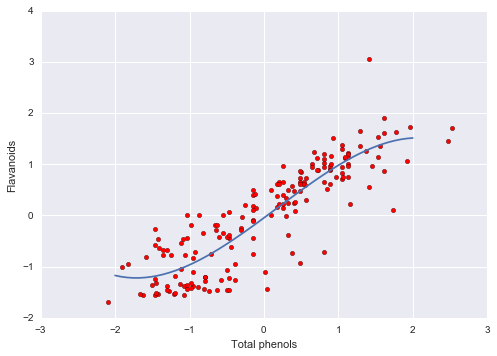

In [25]:
axes = wine.plot.scatter('Total phenols', 'Flavanoids', c='red')
phenols, flavanoids = wine[['Total phenols', 'Flavanoids']].T.values
b0,b1,b2,b3 = fmin(sum_squares_cubic, [0,1,-1,0], args=(phenols, flavanoids))
xvals = np.linspace(-2, 2)
axes.plot(xvals, b0 + b1*xvals + b2*(xvals**2) + b3*(xvals**3))

In practice, we need not fit least squares models by hand because they are implemented generally in packages such as [`scikit-learn`](http://scikit-learn.org/) and [`statsmodels`](https://github.com/statsmodels/statsmodels/). For example, `scikit-learn` package implements least squares models in its `LinearRegression` class:

# Introduction to `Scikit-learn`

The `scikit-learn` package is an open-source library that provides a robust set of machine learning algorithms for Python. It is built upon the core Python scientific stack (*i.e.* NumPy, SciPy, Cython), and has a simple, consistent API, making it useful for a wide range of statistical learning applications.

![scikit learn methods](images/sklearn.png)

## What is Machine Learning?

Machine Learning (ML) is about coding programs that automatically adjust their performance from exposure to information encoded in data. This learning is achieved via **tunable parameters** that are automatically adjusted according to performance criteria.

Machine Learning can be considered a subfield of Artificial Intelligence (AI).

There are three major classes of ML:

**Supervised learning**
: Algorithms which learn from a training set of *labeled* examples (exemplars) to generalize to the set of all possible inputs. Examples of supervised learning include regression and support vector machines.

**Unsupervised learning**
: Algorithms which learn from a training set of *unlableled* examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation.

**Reinforcement learning**
: Algorithms that learn via reinforcement from a *critic* that provides information on the quality of a solution, but not on how to improve it. Improved solutions are achieved by iteratively exploring the solution space. We will not cover RL in this workshop.

## Representing Data in `scikit-learn`

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

For a given scikit-learn **estimator** object named `model`, several methods are available. Irrespective of the type of **estimator**, there will be a `fit` method:

- `model.fit` : fit training data. For supervised learning applications, this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`). For unsupervised learning applications, this accepts only a single argument, the data `X` (e.g. `model.fit(X)`).

> During the fitting process, the state of the **estimator** is stored in attributes of the estimator instance named with a trailing underscore character (\_). For example, the sequence of regression trees `sklearn.tree.DecisionTreeRegressor` is stored in `estimators_` attribute.

The **predictor** interface extends the notion of an estimator by adding a `predict` method that takes an array `X_test` and produces predictions based on the learned parameters of the estimator. In the case of supervised learning estimators, this method typically returns the predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as k-means, where the predicted values are the cluster labels.

**supervised estimators** are expected to have the following methods:

- `model.predict` : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`), and returns the learned label for each object in the array.
- `model.predict_proba` : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by `model.predict()`.
- `model.score` : for classification or regression problems, most (all?) estimators implement a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.

Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a **transformer** interface which deﬁnes a `transform` method. It takes as input some new data `X_test` and yields as output a transformed version. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library.

**unsupervised estimators** will always have these methods:

- `model.transform` : given an unsupervised model, transform new data into the new basis. This also accepts one argument `X_new`, and returns the new representation of the data based on the unsupervised model.
- `model.fit_transform` : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

## `scikit-learn` interface

All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: 

* **estimator** interface for building and ﬁtting models
* **predictor** interface for making predictions
* **transformer** interface for converting data.

The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a fit method for learning a model from training data. All supervised and unsupervised learning algorithms (*e.g.*, for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

Scikit-learn strives to have a uniform interface across all methods. For example, a typical **estimator** follows this template:

In [97]:
class Estimator(object):
  
    def fit(self, X, y=None):
        """Fit model to data X (and y)"""
        self.some_attribute = self.some_fitting_method(X, y)
        return self
            
    def predict(self, X_test):
        """Make prediction based on passed features"""
        pred = self.make_prediction(X_test)
        return pred

One commonly-used statistical method in scikit-learn is the Principal Components Analysis, which is implemented in the `PCA` class:

In [61]:
from sklearn.decomposition import PCA

wine_predictors = wine[wine.columns[1:]]
pca = PCA(n_components=2, whiten=True).fit(wine_predictors)
X_pca = pd.DataFrame(pca.transform(wine_predictors), columns=['Component 1' , 'Component 2'])

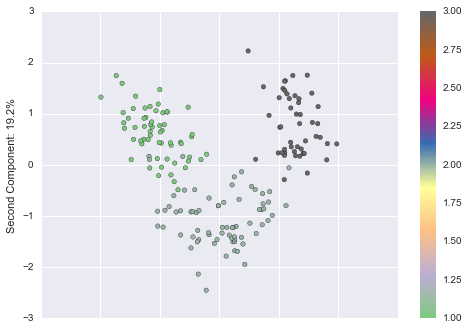

In [71]:
axes = X_pca.plot.scatter(x='Component 1' , y='Component 2', c=wine.Grape, cmap='Accent')
var_explained = pca.explained_variance_ratio_ * 100
axes.set_xlabel('First Component: {0:.1f}%'.format(var_explained[0]))
axes.set_ylabel('Second Component: {0:.1f}%'.format(var_explained[1]))

Similarly, there is a `LinearRegression` class we can use for our regression model:

In [27]:
from sklearn import linear_model

straight_line = linear_model.LinearRegression()
straight_line.fit(data.x.reshape(-1, 1), data.y)

/Users/fonnescj/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
straight_line.coef_

array([ 3.])

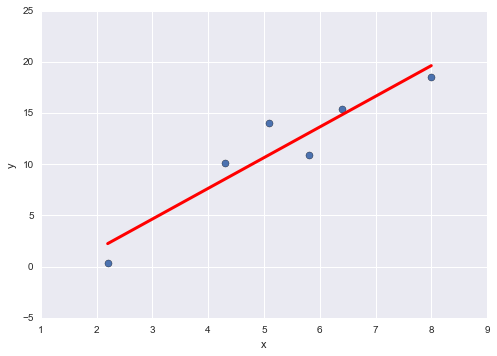

In [30]:
axes = data.plot.scatter('x', 'y', s=50)
axes.plot(data.x, straight_line.predict(data.x[:, np.newaxis]), color='red',
         linewidth=3)

For more general regression model building, its helpful to use a tool for describing statistical models, called `patsy`. With `patsy`, it is easy to specify the desired combinations of variables for any particular analysis, using an "R-like" syntax. `patsy` parses the formula string, and uses it to construct the approriate *design matrix* for the model.

For example, the quadratic model specified by hand above can be coded as:

In [31]:
from patsy import dmatrix

X = dmatrix('phenols + I(phenols**2) + I(phenols**3)')
pd.DataFrame(X).head()

,0,1,2,3
0,1.0,0.81,0.6561,0.531441
1,1.0,0.57,0.3249,0.185193
2,1.0,0.81,0.6561,0.531441
3,1.0,2.48,6.1504,15.252992
4,1.0,0.81,0.6561,0.531441


The `dmatrix` function returns the design matrix, which can be passed directly to the `LinearRegression` fitting method.

In [32]:
poly_line = linear_model.LinearRegression(fit_intercept=False)
poly_line.fit(X, flavanoids)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [33]:
poly_line.coef_

array([-0.0477075 ,  1.07353221,  0.05461979, -0.10038996])

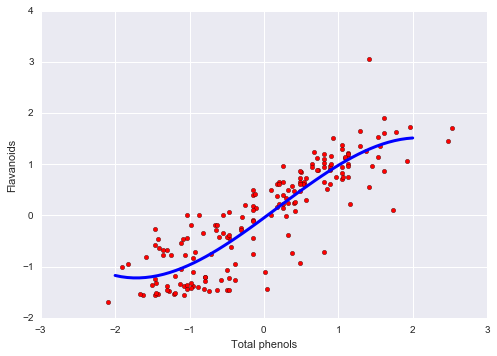

In [34]:
axes = wine.plot.scatter('Total phenols', 'Flavanoids', c='red')
axes.plot(xvals, poly_line.predict(dmatrix('xvals + I(xvals**2) + I(xvals**3)')), color='blue',
         linewidth=3)

## Logistic Regression

Fitting a line to the relationship between two variables using the least squares approach is sensible when the variable we are trying to predict is continuous, but what about when the data are dichotomous?

- male/female
- pass/fail
- died/survived

Let's consider the problem of predicting survival in the Titanic disaster, based on our available information. For example, lets say that we want to predict survival as a function of the fare paid for the journey.

In [36]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.name.head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

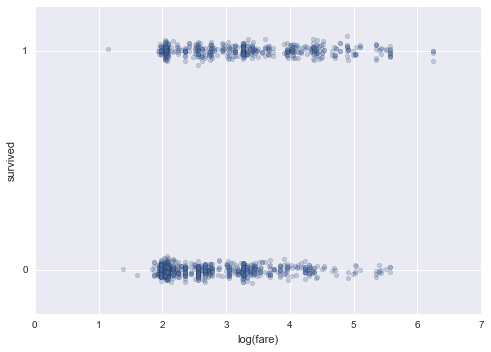

In [41]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
axes = (titanic.assign(logfar=np.log(titanic.fare), surv_jit=titanic.survived + jitter)
         .plot.scatter('logfar', 'surv_jit', alpha=0.3))
axes.set_yticks([0,1])
axes.set_ylabel('survived')
axes.set_xlabel('log(fare)');

I have added random jitter on the y-axis to help visualize the density of the points, and have plotted fare on the log scale.

Clearly, fitting a line through this data makes little sense, for several reasons. First, for most values of the predictor variable, the line would predict values that are not zero or one. Second, it would seem odd to choose least squares (or similar) as a criterion for selecting the best line.

In [42]:
x = np.log(titanic.fare[titanic.fare>0])
y = titanic.survived[titanic.fare>0]
betas_titanic = fmin(sum_of_squares, [1,1], args=(x,y))

Optimization terminated successfully.
         Current function value: 277.621917
         Iterations: 55
         Function evaluations: 103


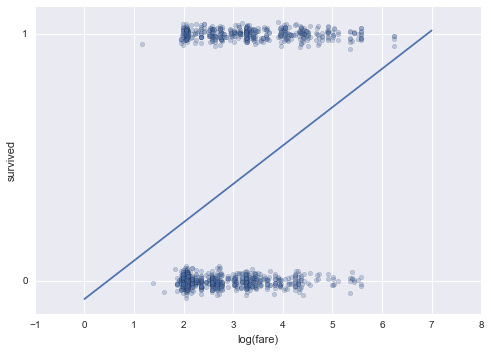

In [43]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
axes = (titanic.assign(logfar=np.log(titanic.fare), surv_jit=titanic.survived + jitter)
         .plot.scatter('logfar', 'surv_jit', alpha=0.3))
axes.set_yticks([0,1])
axes.set_ylabel('survived')
axes.set_xlabel('log(fare)')

axes.plot([0,7], [betas_titanic[0], betas_titanic[0] + betas_titanic[1]*7.])

If we look at this data, we can see that for most values of `fare`, there are some individuals that survived and some that did not. However, notice that the cloud of points is denser on the "survived" (`y=1`) side for larger values of fare than on the "died" (`y=0`) side.

### Stochastic model

Rather than model the binary outcome explicitly, it makes sense instead to model the *probability* of death or survival in a **stochastic** model. Probabilities are measured on a continuous [0,1] scale, which may be more amenable for prediction using a regression line. We need to consider a different probability model for this exerciese however; let's consider the **Bernoulli** distribution as a generative model for our data:

<div style="font-size: 120%;">  
$$f(y|p) = p^{y} (1-p)^{1-y}$$ 
</div>  

where $y = \{0,1\}$ and $p \in [0,1]$. So, this model predicts whether $y$ is zero or one as a function of the probability $p$. Notice that when $y=1$, the $1-p$ term disappears, and when $y=0$, the $p$ term disappears.

So, the model we want to fit should look something like this:

<div style="font-size: 120%;">  
$$p_i = \beta_0 + \beta_1 x_i + \epsilon_i$$
</div>

However, since $p$ is constrained to be between zero and one, it is easy to see where a linear (or polynomial) model might predict values outside of this range. We can modify this model sligtly by using a **link function** to transform the probability to have an unbounded range on a new scale. Specifically, we can use a **logit transformation** as our link function:

<div style="font-size: 120%;">  
$$\text{logit}(p) = \log\left[\frac{p}{1-p}\right] = x$$
</div>

Here's a plot of $p/(1-p)$

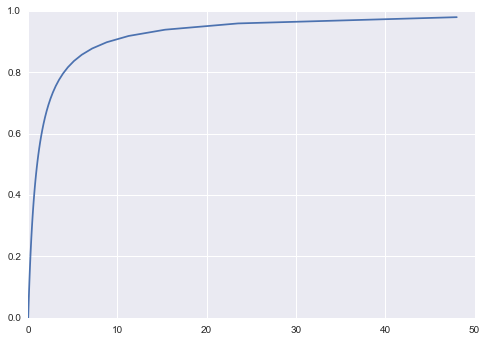

In [44]:
logit = lambda p: np.log(p/(1.-p))
unit_interval = np.linspace(0,1)
plt.plot(unit_interval/(1-unit_interval), unit_interval)

And here's the logit function:

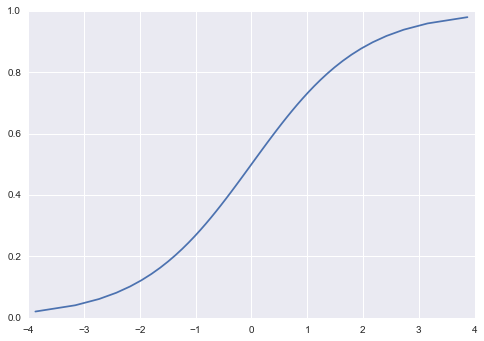

In [45]:
plt.plot(logit(unit_interval), unit_interval)

The inverse of the logit transformation is:

<div style="font-size: 150%;">  
$$p = \frac{1}{1 + \exp(-x)}$$
</div>

In [46]:
invlogit = lambda x: 1. / (1 + np.exp(-x))

So, now our model is:

<div style="font-size: 120%;">  
$$\text{logit}(p_i) = \beta_0 + \beta_1 x_i + \epsilon_i$$
</div>

We can fit this model using maximum likelihood. Our likelihood, again based on the Bernoulli model is:

<div style="font-size: 120%;">  
$$L(y|p) = \prod_{i=1}^n p_i^{y_i} (1-p_i)^{1-y_i}$$
</div>

which, on the log scale is:

<div style="font-size: 120%;">  
$$l(y|p) = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
</div>

We can easily implement this in Python, keeping in mind that `fmin` minimizes, rather than maximizes functions:

In [47]:
invlogit = lambda x: 1/(1 + np.exp(-x))

def logistic_like(theta, x, y):
    
    p = invlogit(theta[0] + theta[1] * x)
    
    # Return negative of log-likelihood
    return -np.sum(y * np.log(p) + (1-y) * np.log(1 - p))

Remove null values from variables

In [48]:
x, y = titanic[titanic.fare.notnull()][['fare', 'survived']].values.T

... and fit the model.

In [49]:
b0, b1 = fmin(logistic_like, [0.5,0], args=(x,y))
b0, b1

Optimization terminated successfully.
         Current function value: 827.015955
         Iterations: 47
         Function evaluations: 93


(-0.88238984528338194, 0.012452067664164127)

(0, 600)

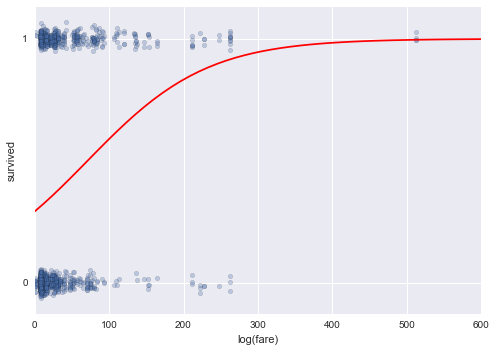

In [52]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
axes = (titanic.assign(surv_jit=titanic.survived + jitter)
         .plot.scatter('fare', 'surv_jit', alpha=0.3))
axes.set_yticks([0,1])
axes.set_ylabel('survived')
axes.set_xlabel('log(fare)')

xvals = np.linspace(0, 600)
axes.plot(xvals, invlogit(b0+b1*xvals),c='red')
axes.set_xlim(0, 600)

As with our least squares model, we can easily fit logistic regression models in `scikit-learn`, in this case using the `LogisticRegression`.

In [82]:
from sklearn.cross_validation import train_test_split
X0 = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X0, y)

The `LogisticRegression` model in scikit-learn employs a regularization coefficient `C`, which defaults to 1. The amount of regularization is lower with larger values of C.

Regularization penalizes the values of regression coefficients, while smaller ones let the coefficients range widely. Scikit-learn includes two penalties: a **l2** penalty which penalizes the sum of the squares of the coefficients (the default), and a **l1** penalty which penalizes the sum of the absolute values.

The reason for doing regularization is to let us to include more covariates than our data might otherwise allow. We only have a few coefficients, so we will set `C` to a large value.

In [75]:
from sklearn.linear_model import LogisticRegression

lrmod = LogisticRegression(C=1000)
lrmod.fit(X_train, y_train)

pred_train = lrmod.predict(X_train)
pred_test = lrmod.predict(X_test)

In [76]:
pd.crosstab(y_train, pred_train, 
            rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,569,34
1.0,299,79


In [77]:
pd.crosstab(y_test, pred_test, 
            rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,190,15
1.0,94,28


In [79]:
lrmod.fit(x[:, np.newaxis], y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
lrmod.coef_

array([[ 0.01245109]])

### Exercise: multivariate logistic regression

Which other variables might be relevant for predicting the probability of surviving the Titanic? Generalize the model likelihood to include 2 or 3 other covariates from the dataset.

In [ ]:
# Write your answer here

# Estimating Uncertainty: Bootstrapping

Resampling is the process of repeatedly **drawing subsamples** from a training dataset, and fitting a model to each sample with the goal of discovering additional properties or information about the model. For example, in a regression modeling context, we can fit a particular regression model to each sample, and observe **how the fits vary** among the samples. 

We will introduce **bootstrapping**, an important resampling method that is used in statistical and machine learning applications, particularly for **assessing** models and estimating the **precision** of parameter estimates.

## Bootstrapping

Parametric inference can be **non-robust**:

* inaccurate if parametric assumptions are violated
* if we rely on asymptotic results, we may not achieve an acceptable level of accuracy

Parmetric inference can be **difficult**:

* derivation of sampling distribution may not be possible

An alternative is to estimate the sampling distribution of a statistic *empirically* without making assumptions about the form of the population.

We have seen this already with the kernel density estimate.

### Non-parametric Bootstrap

The bootstrap is a resampling method discovered by [Brad Efron](http://www.jstor.org/discover/10.2307/2958830?uid=3739568&uid=2&uid=4&uid=3739256&sid=21102342537691) that allows one to approximate the true sampling distribution of a dataset, and thereby obtain estimates of the mean and variance of the distribution.

Bootstrap sample:

<div style="font-size: 120%;">  
$$S_1^* = \{x_{11}^*, x_{12}^*, \ldots, x_{1n}^*\}$$
</div>

$S_i^*$ is a sample of size $n$, **with** replacement.

In Python, we have already seen sampling. If we want to use NumPy for this, we can permute the column of names to obtain a sample:

We regard S as an "estimate" of population P

> population : sample :: sample : bootstrap sample

The idea is to generate replicate bootstrap samples:

<div style="font-size: 120%;">  
$$S^* = \{S_1^*, S_2^*, \ldots, S_R^*\}$$
</div>

Compute statistic $t$ (estimate) for each bootstrap sample:

<div style="font-size: 120%;">  
$$T_i^* = t(S^*)$$
</div>

We can bootstrap some confidence intervals for our logistic regression:

In [98]:
import numpy as np

R = 1000
boot_samples = np.empty((n, len(lrmod.coef_[0])))

for i in np.arange(R):
    boot_ind = np.random.randint(0, len(X0), len(X0))
    y_i, X_i = y[boot_ind], X0[boot_ind]
    
    lrmod_i = LogisticRegression(C=1000)
    lrmod_i.fit(X_i, y_i)

    boot_samples[i] = lrmod_i.coef_[0]

### Bootstrap Percentile Intervals

An attractive feature of bootstrap statistics is the ease with which you can obtain an estimate of *uncertainty* for a given statistic. We simply use the empirical quantiles of the bootstrapped statistics to obtain percentiles corresponding to a confidence interval of interest.

This employs the *ordered* bootstrap replicates:

$$T_{(1)}^*, T_{(2)}^*, \ldots, T_{(R)}^*$$

Simply extract the $100(\alpha/2)$ and $100(1-\alpha/2)$ percentiles:

$$T_{[(R+1)\alpha/2]}^* \lt \theta \lt T_{[(R+1)(1-\alpha/2)]}^*$$

In [99]:
boot_samples.sort(axis=0)
boot_samples[:10]

array([[ 0.00761884],
       [ 0.00796092],
       [ 0.0080264 ],
       [ 0.008138  ],
       [ 0.00822964],
       [ 0.00839841],
       [ 0.0084001 ],
       [ 0.00847848],
       [ 0.00848874],
       [ 0.00853626]])

In [100]:
boot_samples[-10:]

array([[ 0.01854494],
       [ 0.01887907],
       [ 0.01950456],
       [ 0.01959413],
       [ 0.01961039],
       [ 0.01978793],
       [ 0.01991565],
       [ 0.01994141],
       [ 0.020249  ],
       [ 0.02168253]])

In [101]:
boot_interval = boot_samples[[25, 975], :].T

In [102]:
boot_interval

array([[ 0.00903363,  0.01712913]])

In [103]:
lrmod.coef_[0]

array([ 0.01245109])

Since we have estimated the expectation of the bootstrapped statistics, we can estimate the **bias** of T:

$$\hat{B}^* = \bar{T}^* - T$$


In [104]:
boot_samples.mean() - lrmod.coef_[0]

array([ 0.00023127])

In [105]:
boot_var = ((boot_samples - boot_samples.mean()) ** 2).sum() / (R-1)
boot_var

4.2631523552320737e-06

### Bootstrap error

There are two sources of error in bootstrap estimates:

1. **Sampling error** from the selection of $S$.
2. **Bootstrap error** from failing to enumerate all possible bootstrap samples.

For the sake of accuracy, it is prudent to choose at least R=1000

### Exercise: Cervical dystonia bootstrap estimates

Use bootstrapping to estimate the mean of one of the treatment groups, and calculate percentile intervals for the mean.

In [12]:
# Write your answer here

## Unsupvervised Learning: Clustering

Clustering is a class of unsupervised learning methods that associates observations according to some specified measure of similarity (e.g. Euclidean distance).

## K-means Algorithm

The K-means clustering algorithm associates each point $x_i$ in a set of input points $\{x_1, x_2, \ldots, x_m\}$ to $K$ clusters. Each cluster is specified by a **centroid** that is the average location of all the points in the cluster. The algorithm proceeds iteratively from arbitrary centroid locations, updating the membership of each point according to minimum distance, then updating the centroid location based on the new cluster membership. 

The algorithm will have converged when the assignment of points to centroids does not change with each iteration.

### Algorithm

1. Initialize cluster centroids:

    $$\mu^{(0)}_1, \ldots, \mu^{(0)}_k \in \mathbb{R}^n$$

2. Iterate until converged:

    a. Set $c_i = \text{argmin}_j || x_i - \mu_j^{(s)} ||$
    
    b. Update centroids:
    
    $$\mu_j^{(s+1)} = \frac{\sum_{i=1}^m I[c_i = j] x_i}{\sum_{i=1}^m I[c_i = j]}$$

The K-means algorithm is simply a Gaussian mixture model with two restrictions: 

1. the covariance matrix is spherical: 

    $$\Sigma_k = \sigma I_D$$

2. the mixture weights are fixed:

    $$\pi_k = \frac{1}{K}$$

Hence, we are only interested in locating the appropriate centroid of the clusters. This serves to speed computation.

We can define the distortion function:

$$J(c,\mu) = \sum_{i]1}^m ||x_i - \mu_{c_i}||$$

which gets smaller at every iteration. So, k-means is coordinate ascent on $J(c,\mu)$

### Choosing $k$

To check whether a chosen $k$ is reasonable, one approach is to compare the distances between the centroids to the mean distance bewween each data point and their assigned centroid. A good fit involves relatively large inter-centroid distances. 

The appropriate value for k (the number of clusters) may depend on the goals of the analysis, or it may be chosen algorithmically, using an optimization procedure.

## Example: wine data

In [28]:
for i,x in enumerate(X.columns):
    print(i,x)

0 Alcohol
1 Malic acid
2 Ash
3 Alcalinity of ash
4 Magnesium
5 Total phenols
6 Flavanoids
7 Nonflavanoid phenols
8 Proanthocyanins
9 Color intensity
10 Hue
11 OD280/OD315 of diluted wines
12 Proline


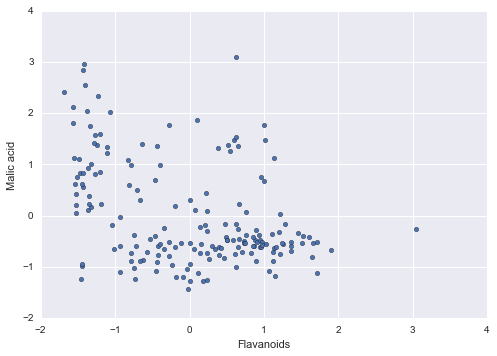

In [110]:
wine.plot.scatter('Flavanoids', 'Malic acid')

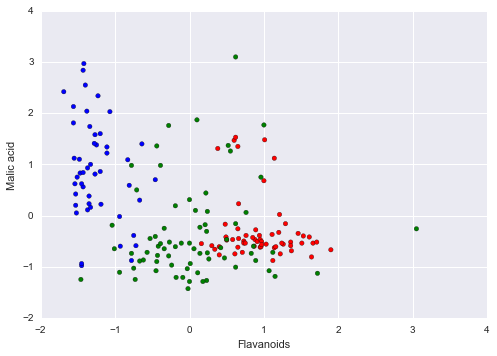

In [161]:
wine.plot.scatter('Flavanoids', 'Malic acid', c=np.array(list('rgbc'))[wine.Grape-1])

Let's start with $k=3$, arbitrarily assigned:

In [129]:
centroids = (-1, 2), (-1, -1), (1, 1)

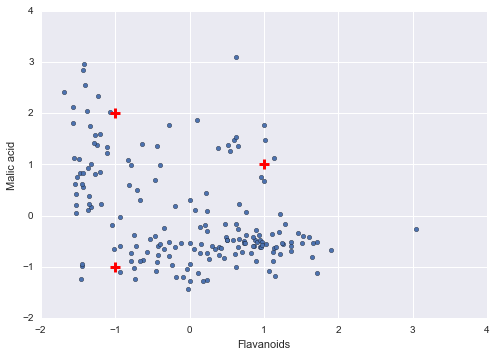

In [130]:
axes = wine.plot.scatter('Flavanoids', 'Malic acid')
axes.scatter(*np.transpose(centroids), c='r', lw=3, marker='+', s=100)

We can use the function `cdist` from SciPy to calculate the distances from each point to each centroid.

In [132]:
from scipy.spatial.distance import cdist

distances = cdist(centroids, wine[['Flavanoids', 'Malic acid']])
distances.shape

(3, 178)

We can make the initial assignment to centroids by picking the minimum distance.

In [133]:
labels = distances.argmin(axis=0)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

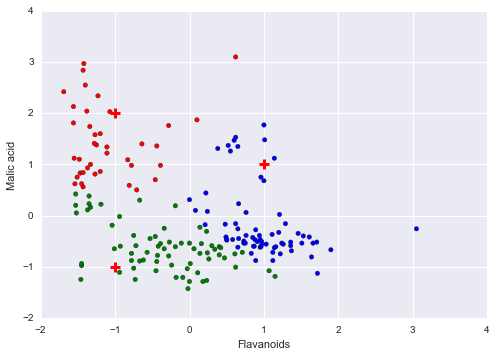

In [134]:
axes = wine.plot.scatter('Flavanoids', 'Malic acid', c=np.array(list('rgbc'))[labels])
axes.scatter(*np.transpose(centroids), c='r', marker='+', lw=3, s=100)

Now we can re-assign the centroid locations based on the means of the current members' locations.

In [135]:
centroids

((-1, 2), (-1, -1), (1, 1))

In [136]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [150]:
new_centroids = [wine.loc[labels==i, ['Flavanoids', 'Malic acid']].values.mean(0) for i in range(len(centroids))]

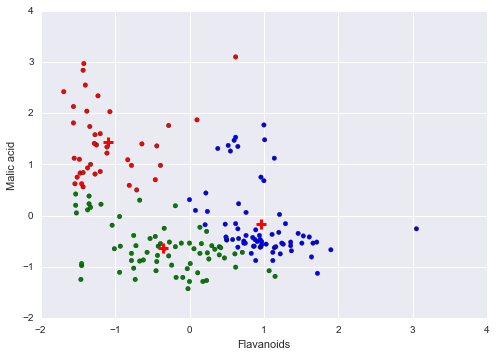

In [152]:
axes = wine.plot.scatter('Flavanoids', 'Malic acid', c=np.array(list('rgbc'))[labels])
axes.scatter(*np.transpose(new_centroids), c='r', marker='+', s=100, lw=3)

So, we simply iterate these steps until convergence.

In [153]:
centroids = new_centroids
iterations = 200

for _ in range(iterations):
    distances = cdist(centroids, wine[['Flavanoids', 'Malic acid']])
    labels = distances.argmin(axis=0)
    centroids = [wine.loc[labels==i, ['Flavanoids', 'Malic acid']].values.mean(0) for i in range(len(centroids))]

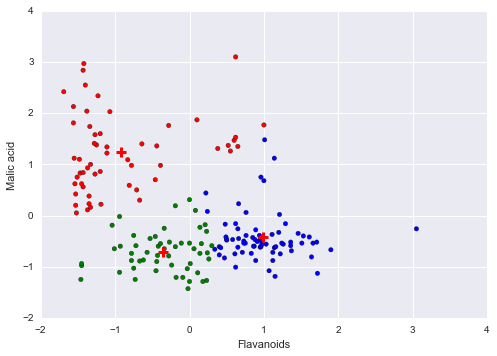

In [154]:
axes = wine.plot.scatter('Flavanoids', 'Malic acid', c=np.array(list('rgbc'))[labels])
axes.scatter(*np.transpose(centroids), c='r', marker='+', s=100, lw=3)

## k-means using `scikit-learn`

The `scikit-learn` package includes a `KMeans` class for flexibly fitting K-means models. It includes additional features, such as initialization options and the ability to set the convergence tolerance.

In [157]:
from sklearn.cluster import KMeans
from numpy.random import RandomState
rng = RandomState(1)

# Instantiate model
kmeans = KMeans(n_clusters=3, random_state=rng)
# Fit model
kmeans.fit(wine[['Flavanoids', 'Malic acid']])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto',
    random_state=<mtrand.RandomState object at 0x11a0778b8>, tol=0.0001,
    verbose=0)

After fitting, we can retrieve the labels and cluster centers.

In [158]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0], dtype=int32)

In [159]:
kmeans.cluster_centers_

array([[-0.82653061,  1.39      ],
       [ 0.93527027, -0.46256757],
       [-0.52436364, -0.61527273]])

The resulting plot should look very similar to the one we fit by hand.

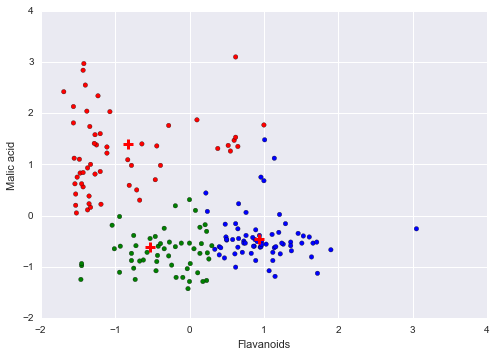

In [160]:
axes = wine.plot.scatter('Flavanoids', 'Malic acid', c=np.array(list('rgbc'))[labels])
axes.scatter(*kmeans.cluster_centers_.T, c='r', marker='+', s=100, lw=3)

## Exercise: more wine

Pick two other wine variables, and see how well they cluster relative to the true classes (grapes):

In [ ]:
## Write answer here

## References

T. Hastie, R. Tibshirani and J. Friedman. (2009) [Elements of Statistical Learning: Data Mining, Inference, and Prediction](http://statweb.stanford.edu/~tibs/ElemStatLearn/), second edition. Springer.
